# The Energy of a Quantum Physical Two-Body System

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

## Constants

In [2]:
# sigma = 1
# x0 = 0

#planck = 6.626e-34
#reduced_planck = planck/(2*np.pi)
#e_mass = 9.109e-31


## Discretization

In [3]:
# Length of interval
L = 10
# No. of subintervals
N = 200
# Stepsize
h = L / (N)

# Argument vector
xi = np.linspace(-L/2, L/2, N)

## Functions

In [4]:
def v_func(x):
    """ Returns the portential function of the quantum system """
    return x**2/2

In [5]:
def psi_func(x, x0, sigma):
    """ Returns the wave function."""
    return np.sqrt(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x-x0)**2/(4*sigma**2))

In [6]:
def populate_vector(func, *args):
    """ Returns a vector of the given function in N range"""
    vector = [func(xi[i], *args) for i in range(N)]
    return np.array(vector).reshape(-1, 1)

In [7]:
## Testing before removal of populate_vector:

psi1 = np.array(psi_func(xi, 1, 2)).reshape(-1, 1)
psi2 = populate_vector(psi_func, 1, 2)
np.testing.assert_almost_equal(psi1, psi2)

v1 = np.array(v_func(xi)).reshape(-1,1)
v2 = populate_vector(v_func)
np.testing.assert_almost_equal(v1,v2)

In [8]:
def finite_difference_scheme():
    """ Returns a matrix representation of a second order central finite difference scheme"""
    m = np.zeros((N,N))
    for i in range(N):
        m[i,i] = -2
        if i+1 < N:
            m[i,i+1] = 1
        if i-1 >= 0:
            m[i, i-1] = 1
    return m

In [9]:
def compute_e(x0, sigma):
    """  """
    psi_vector = np.array(psi_func(xi, x0, sigma)).reshape(-1,1)
    
    #kinetic_constant = -reduced_planck**2/(2*e_mass) # Kan være 1 inntil videre
    h_psi = -1/2*(1/h**2)*(finite_difference_matrix @ psi_vector) + (v_vector * psi_vector)
     
    e = h*(psi_vector.T @ h_psi)  
    
    return e[0][0]

In [10]:
def finite_difference_x(x, y):
    """  """
    return (compute_e(x+h, y) - compute_e(x-h, y))/2*h

In [11]:
def finite_difference_y(x, y):
    return (compute_e(x , y+h) - compute_e(x, y-h))/2*h 

In [12]:
def gradient_step(x0, sigma):
    lr = 1
    # print(finite_difference_e(sigma, x0))
    new_x0 = x0 - lr*finite_difference_x(x0, sigma)
    new_sigma = sigma - lr*finite_difference_y(x0, sigma)
    return (new_x0, new_sigma)
    
    

In [13]:
def gradient_descent(x0, sigma):
    iterations = 0
    max_iterations = 2000
    
    e = compute_e(x0, sigma)    
    
    while (iterations < max_iterations):
    
        new_x0, new_sigma = gradient_step(x0, sigma)
        new_e = compute_e(new_x0, new_sigma)
        
        if new_e > e:
            break
        
        x0, sigma, e =  new_x0, new_sigma, new_e
        gradient_path_list.append([x0, sigma, e])
        iterations += 1
        
        
    print(f"Number of iterations: {iterations}")    
    return x0, sigma

## Computing the Energy

Tweake parameter(lr, x0, sigma).
Lage plot
Sette stoppkriterier.


fasit
x0 = 0
sigma = 1/sqrt(2)
e = 0.5

In [14]:
# Initializing vectors
v_vector = np.array(v_func(xi)).reshape(-1, 1)
finite_difference_matrix = finite_difference_scheme()
    

In [15]:
x0 = -3
sigma = 2
gradient_path_list = []

e = compute_e(x0, sigma)
print(f"Energy at guess {e}")
new_x0, new_sigma = gradient_descent(x0, sigma) 
print(new_x0, new_sigma)
print(compute_e(new_x0, new_sigma))
print(compute_e(0, 1/np.sqrt(2)))

Energy at guess 6.489250466582191
Number of iterations: 1665
-1.7636153504902167e-07 0.7154409123955162
0.4997823853975488
0.4996893134958625


In [16]:
# Forsøk på plotting:

X = np.arange(-15, 15, 0.5)
Y = np.arange(0.1, 5, 0.2)

E = np.zeros((len(X), len(Y)))

for i, x in enumerate(X):
    for j, y in enumerate(Y):
        E[i][j] = compute_e(x, y)

X, Y = np.meshgrid(X, Y)

print(X.shape, Y.shape, E.shape)


(25, 60) (25, 60) (60, 25)


<IPython.core.display.Javascript object>


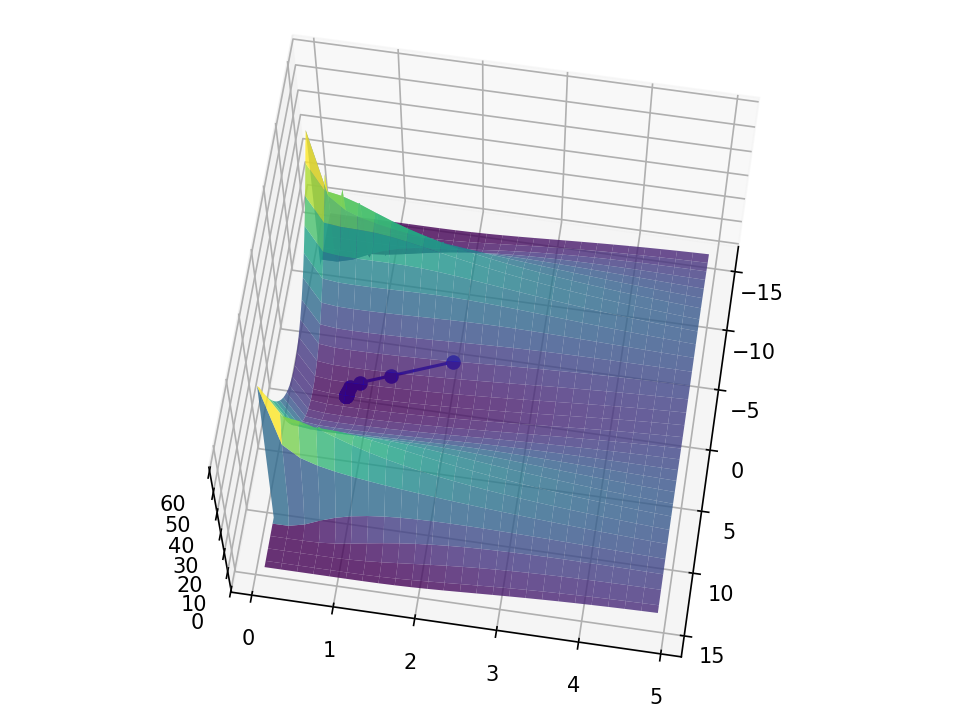

In [17]:
fig = plt.figure()
path_step_size = 50

ax = Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')

gradient_path_list = np.array(gradient_path_list)

ax.plot(gradient_path_list[::path_step_size,0], gradient_path_list[::path_step_size,1], 
        gradient_path_list[::path_step_size, 2], 'bo-')

ax.plot_surface(X, Y, E.T,  cmap=cm.viridis, alpha = 0.8)